In [ ]:
#Blazer Id:- nsomu
#Naga Venkata Pavan Kumar Somu
#Assisgnment-2 
#Machine Learning

In [ ]:
#PART A(Logistic Regression with Scikit-learn)

C:\Users\somu4\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


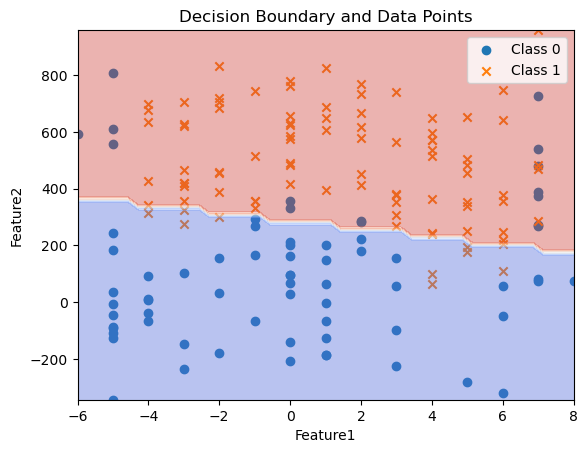

Accuracy: 0.9


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
#loading the dataset
column_names = ['Feature1', 'Feature2', 'Label']
data = pd.read_csv('data.csv', names=column_names)

# Splitting the data into training and testing subsets
X = data[['Feature1', 'Feature2']]
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Plot data points and decision boundary
plt.scatter(X_train[y_train == 0]['Feature1'], X_train[y_train == 0]['Feature2'], label='Class 0', marker='o')
plt.scatter(X_train[y_train == 1]['Feature1'], X_train[y_train == 1]['Feature2'], label='Class 1', marker='x')

feature1_min, feature1_max = X_train['Feature1'].min(), X_train['Feature1'].max()
feature2_min, feature2_max = X_train['Feature2'].min(), X_train['Feature2'].max()
xx, yy = np.meshgrid(np.linspace(feature1_min, feature1_max), np.linspace(feature2_min, feature2_max))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary and Data Points')
plt.legend()
plt.show()

# Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


In [ ]:
#PART B

Iteration 0, Loss: 0.6931471805599454
Iteration 100, Loss: 0.6670876308656194
Iteration 200, Loss: 0.6542254615294122
Iteration 300, Loss: 0.6465998490807702
Iteration 400, Loss: 0.6416162937668457
Iteration 500, Loss: 0.6381991260621374
Iteration 600, Loss: 0.63579684179772
Iteration 700, Loss: 0.6340835890111274
Iteration 800, Loss: 0.632850281762459
Iteration 900, Loss: 0.6319564600762582


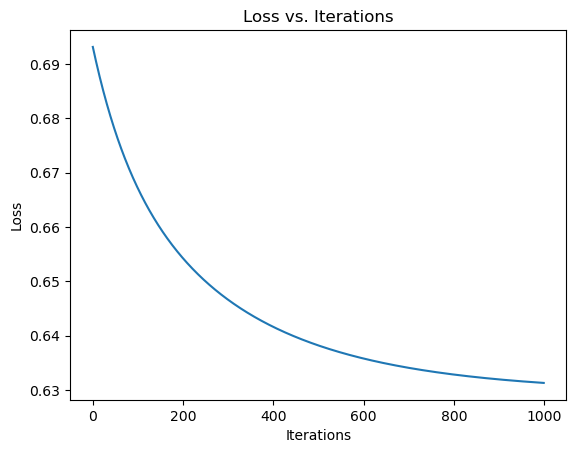

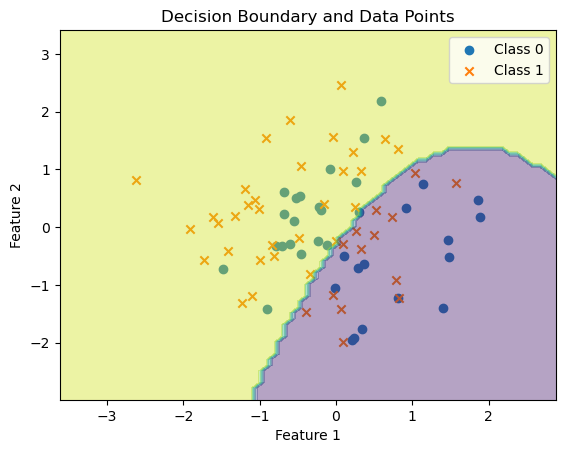

Training Accuracy: 0.575
Testing Accuracy: 0.6


In [27]:
import numpy as np
import matplotlib.pyplot as plt

#logistic regression from scratch
class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.lr = learning_rate
        self.num_iters = num_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        num_samples = len(y)
        loss = (-1/num_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0

        for iteration in range(self.num_iters):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)

            dw = (1/num_samples) * np.dot(X.T, (y_pred - y))
            db = (1/num_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Display loss at each iteration
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Loss: {loss}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)


np.random.seed(42)
X = np.random.randn(100, 2)
y = np.random.randint(0, 2, size=100)


X_enhanced = np.c_[X, X[:, 0] ** 2]  # Adding a new feature as the square of the first feature

# Splitting dataset into training and testing sets(same as parta)
X_train, X_test = X_enhanced[:80], X_enhanced[80:]
y_train, y_test = y[:80], y[80:]

#  Training logistic regression model(feature1&feature2)
mdl = CustomLogisticRegression()
mdl.fit(X_train, y_train)

# Plotting loss vs. iterations
plt.plot(range(len(mdl.loss_history)), mdl.loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss vs. Iterations')
plt.show()

#  Plotting decision boundary and data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Class 0', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Class 1', marker='x')


x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = mdl.predict(np.c_[xx.ravel(), yy.ravel(), xx.ravel() ** 2])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Data Points')
plt.legend()
plt.show()

# Step 7: Evaluating model on testing data
y_pred_train = mdl.predict(X_train)
y_pred_test = mdl.predict(X_test)

# Calculating accuracy
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)
print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)


In [ ]:
#PART C

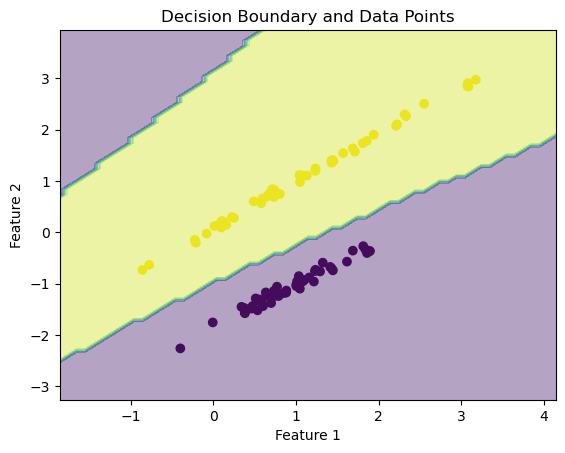

Testing Accuracy: 1.0


In [22]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


features, labels = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_classes=2, n_clusters_per_class=1, random_state=42)


enhanced_features = poly_features.fit_transform(features)

#MODEL training
logistic_model = LogisticRegression()
logistic_model.fit(enhanced_features, labels)

# Plotting the decision boundary and data points
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


x_min, x_max = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min, y_max = features[:, 1].min() - 1, features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predicting the labels to every point in the grid
Z = logistic_model.predict(poly_features.transform(np.c_[xx.ravel(), yy.ravel()]))

# Plotting the decision boundary and data points
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

plt.title('Decision Boundary and Data Points')
plt.show()

# Evaluating model through the testing data
test_accuracy = accuracy_score(labels, logistic_model.predict(enhanced_features))
print("Testing Accuracy:", test_accuracy)


In [ ]:
#PART D

Iteration 0, Training Loss: 0.6931471805599454, Validation Loss: 0.6917927056376092
Validation loss increased. Stopping training.


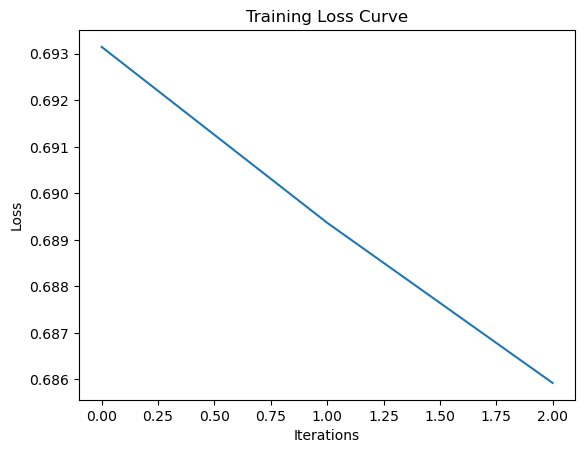

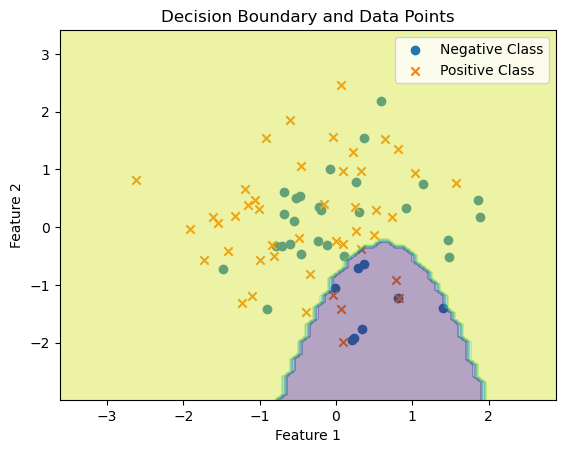

My Model Training Accuracy: 0.6
My Model Testing Accuracy: 0.6


In [23]:
import numpy as np
import matplotlib.pyplot as plt

class MyLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_loss(self, y, y_pred):
        num_samples = len(y)
        loss = (-1/num_samples) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        return loss

    def fit(self, X, y, X_val=None, y_val=None):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        val_loss = None

        for iteration in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            loss = self.compute_loss(y, y_pred)
            self.loss_history.append(loss)

            dw = (1/num_samples) * np.dot(X.T, (y_pred - y))
            db = (1/num_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # calculating validation loss if validation data  is been provided
            if X_val is not None and y_val is not None:
                z_val = np.dot(X_val, self.weights) + self.bias
                y_pred_val = self.sigmoid(z_val)
                val_loss = self.compute_loss(y_val, y_pred_val)

            #  loss at every iteration
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Training Loss: {loss}, Validation Loss: {val_loss}")

          
            if val_loss is not None and iteration > 0 and val_loss > self.loss_history[-2]:
                print("Validation loss increased. Stopping training.")
                break

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)


np.random.seed(42)
X_data = np.random.randn(100, 2)
y_data = np.random.randint(0, 2, size=100)


X_extended = np.c_[X_data, X_data[:, 0] ** 2]  

# Splitting the dataset into training and testing sets
X_train, X_test = X_extended[:80], X_extended[80:]
y_train, y_test = y_data[:80], y_data[80:]

#Training the logistic regression model with validation data
model = MyLogisticRegression(learning_rate=0.1, num_iterations=5000)
model.fit(X_train, y_train, X_test, y_test)

# Plotting the loss 
plt.plot(range(len(model.loss_history)), model.loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()

#  Plotting the decision boundary and data points
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], label='Negative Class', marker='o')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], label='Positive Class', marker='x')


x_min_plot, x_max_plot = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min_plot, y_max_plot = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx_plot, yy_plot = np.meshgrid(np.arange(x_min_plot, x_max_plot, 0.1), np.arange(y_min_plot, y_max_plot, 0.1))
Z_plot = model.predict(np.c_[xx_plot.ravel(), yy_plot.ravel(), xx_plot.ravel() ** 2])
Z_plot = Z_plot.reshape(xx_plot.shape)
plt.contourf(xx_plot, yy_plot, Z_plot, alpha=0.4, cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary and Data Points')
plt.legend()
plt.show()

#  Evaluating model on testing data
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating the accuracy
train_accuracy_my = np.mean(y_pred_train == y_train)
test_accuracy_my = np.mean(y_pred_test == y_test)
print("My Model Training Accuracy:", train_accuracy_my)
print("My Model Testing Accuracy:", test_accuracy_my)
